In [1]:
# Core Libraries
import requests
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#from dotenv import load_dotenv

# For EDA & Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For Modeling (we’ll use these later)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set the random seed for reproducibility
np.random.seed(42)

In [6]:
# Set display settings
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv("../data/karachi_hourly_aqi_weather.csv")

#show
df.head()

,time,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Precipitation
0,2023-01-01 00:00:00,132,52.4,83.6,40.5,44.2,1013.0,82.0,17.9,85.0,0.0
1,2023-01-01 01:00:00,134,48.5,78.2,34.2,38.5,905.0,84.0,17.6,85.0,0.0
2,2023-01-01 02:00:00,135,44.1,72.2,27.4,31.6,761.0,85.0,17.0,86.0,0.0
3,2023-01-01 03:00:00,136,39.9,66.4,23.7,27.4,655.0,85.0,16.2,87.0,0.0
4,2023-01-01 04:00:00,136,36.4,61.5,21.0,23.7,547.0,84.0,15.8,86.0,0.0


In [7]:
# Check basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22512 entries, 0 to 22511
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           22512 non-null  object 
 1   AQI            22512 non-null  int64  
 2   PM2.5          22512 non-null  float64
 3   PM10           22512 non-null  float64
 4   NO2            22512 non-null  float64
 5   SO2            22512 non-null  float64
 6   CO             22512 non-null  float64
 7   O3             22512 non-null  float64
 8   Temperature    22446 non-null  float64
 9   Humidity       22446 non-null  float64
 10  Precipitation  22446 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.9+ MB
None
                AQI         PM2.5          PM10           NO2           SO2  \
count  22512.000000  22512.000000  22512.000000  22512.000000  22512.000000   
mean      88.057569     29.279824     66.013153     19.578181     14.110585   
std       30.61

In [9]:
print(df.isnull().sum())

time              0
AQI               0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
O3                0
Temperature      66
Humidity         66
Precipitation    66
dtype: int64


In [11]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as index
df.set_index('time', inplace=True)

# Now extract time-based features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['month'] = df.index.month_name()


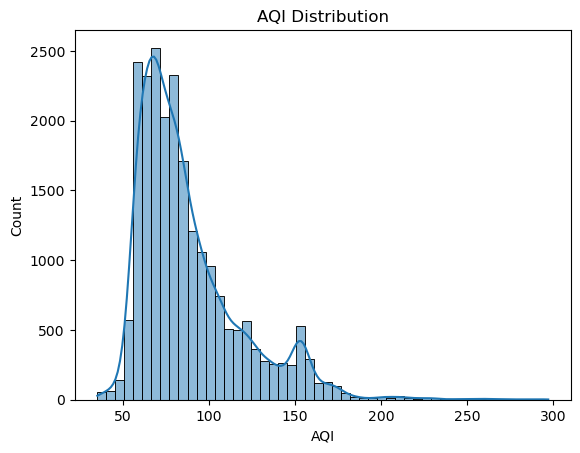

In [12]:
sns.histplot(df['AQI'], bins=50, kde=True)
plt.title("AQI Distribution")
plt.show()


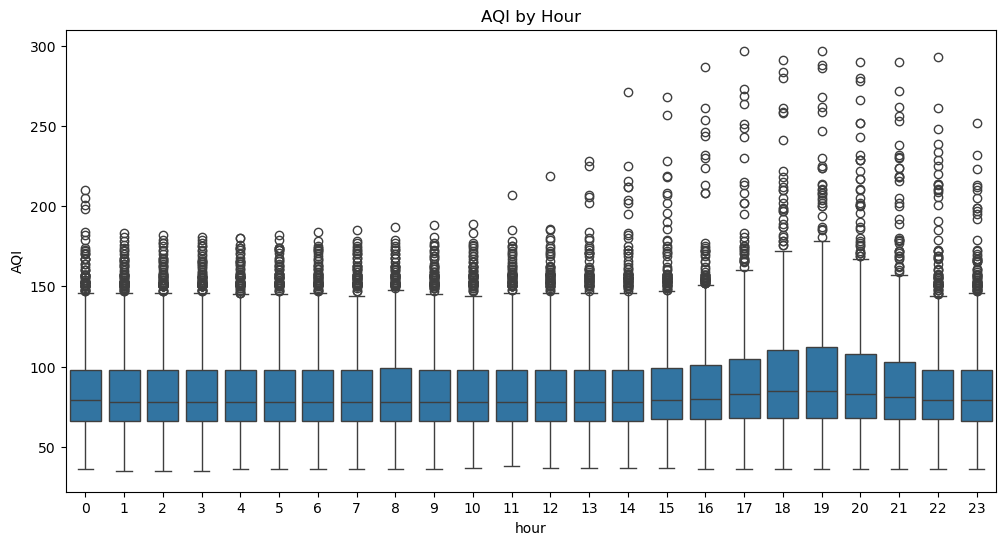

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='AQI', data=df)
plt.title("AQI by Hour")
plt.show()


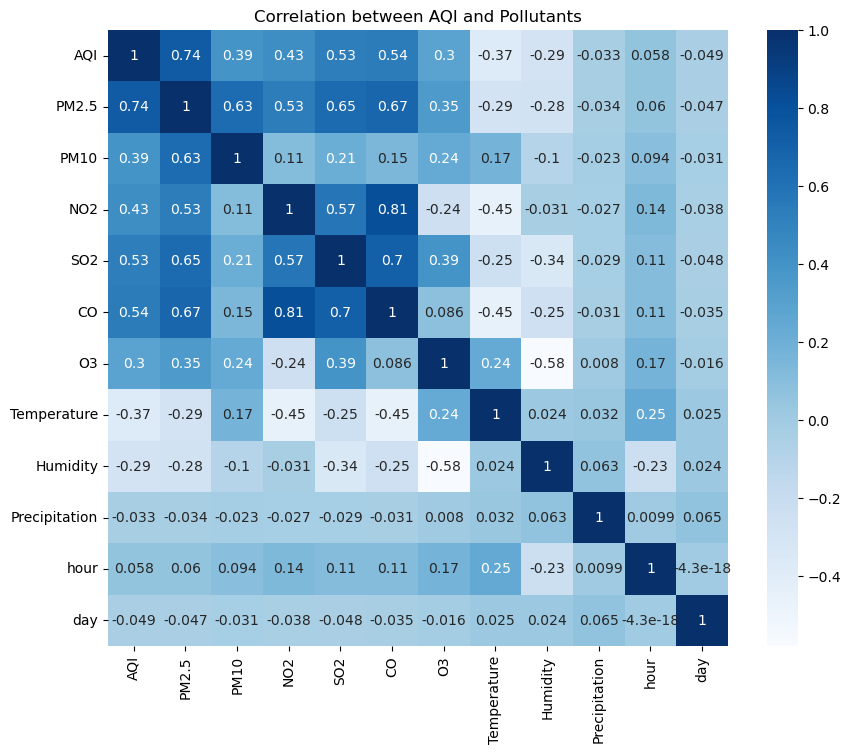

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation between AQI and Pollutants")
plt.show()


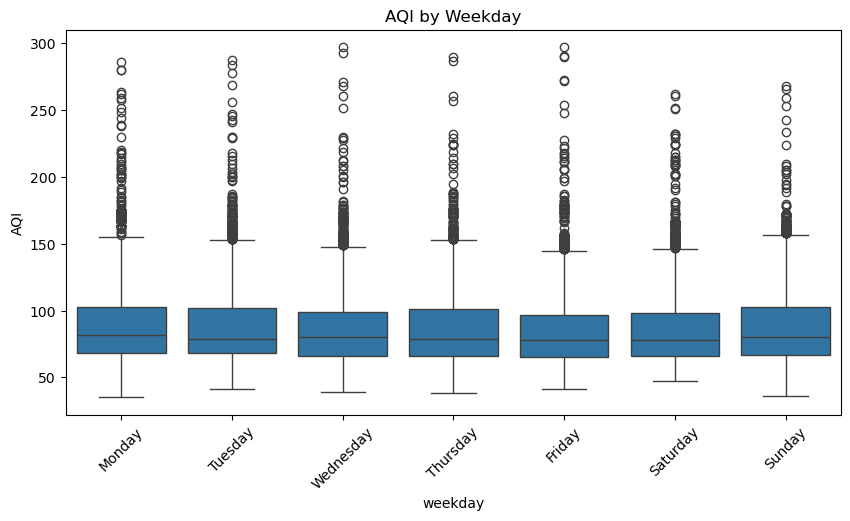

In [19]:
# Boxplot for AQI by weekday
plt.figure(figsize=(10,5))
sns.boxplot(x='weekday', y='AQI', data=df,
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=45)
plt.title("AQI by Weekday")
plt.show()


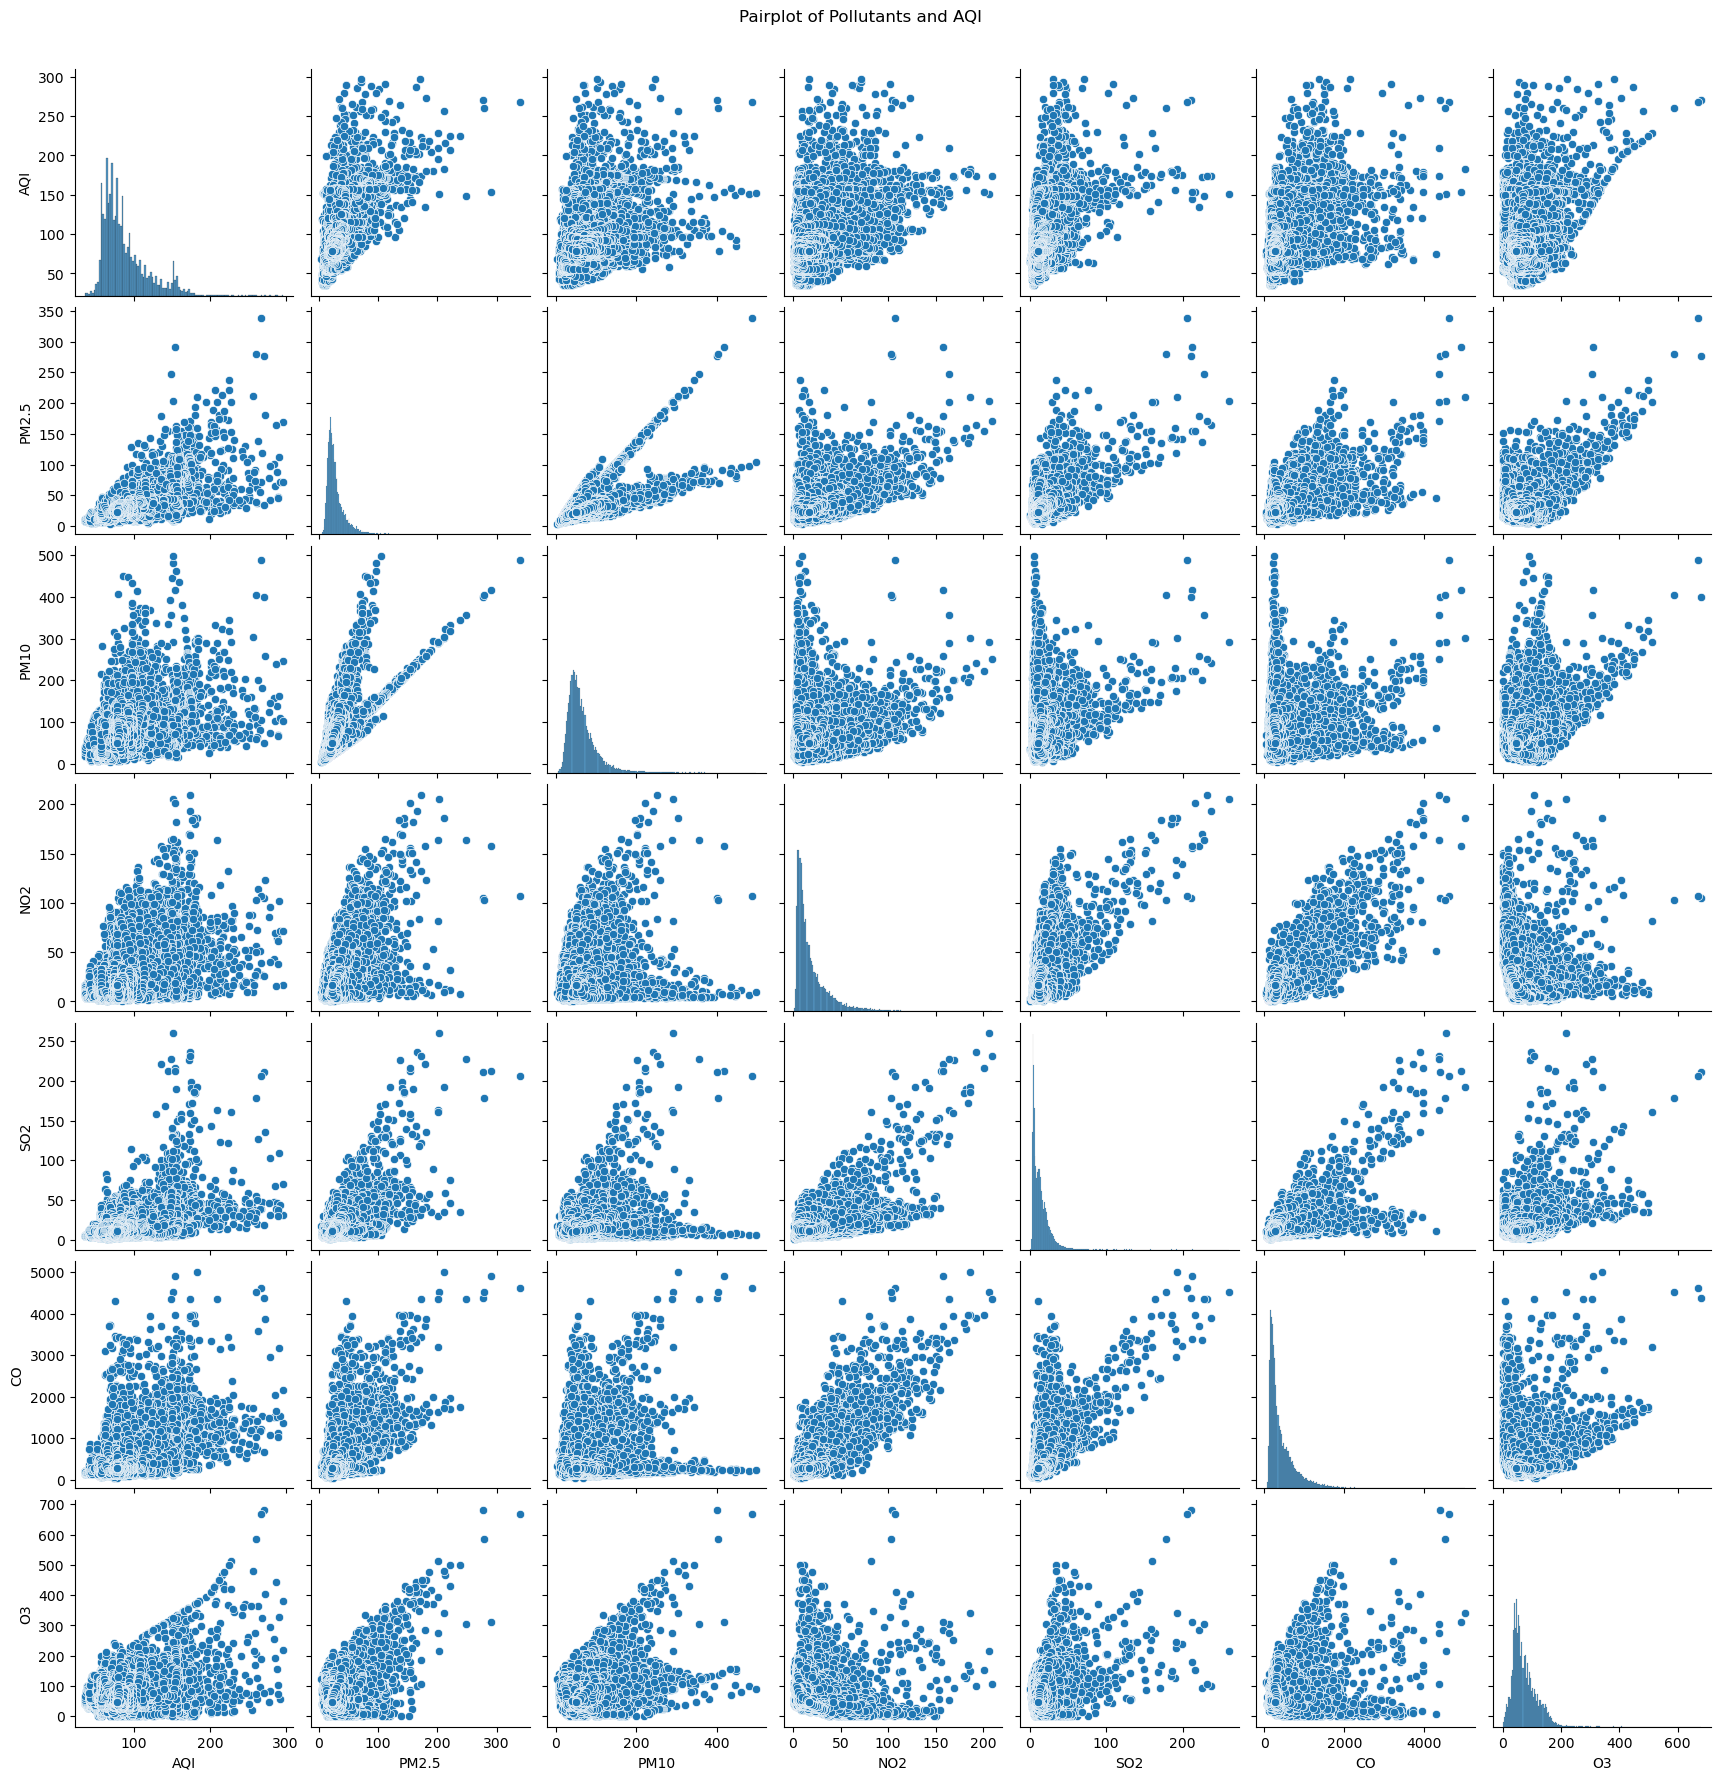

In [20]:
sns.pairplot(df[['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']])
plt.suptitle("Pairplot of Pollutants and AQI", y=1.02)
plt.show()


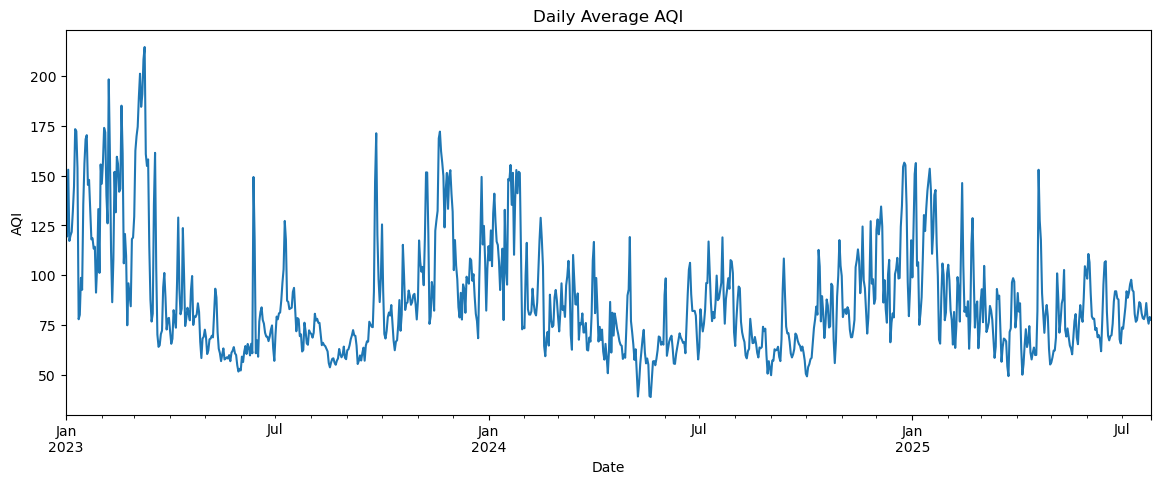

In [21]:
df_daily = df['AQI'].resample('D').mean()

plt.figure(figsize=(14,5))
df_daily.plot()
plt.title("Daily Average AQI")
plt.ylabel("AQI")
plt.xlabel("Date")
plt.show()


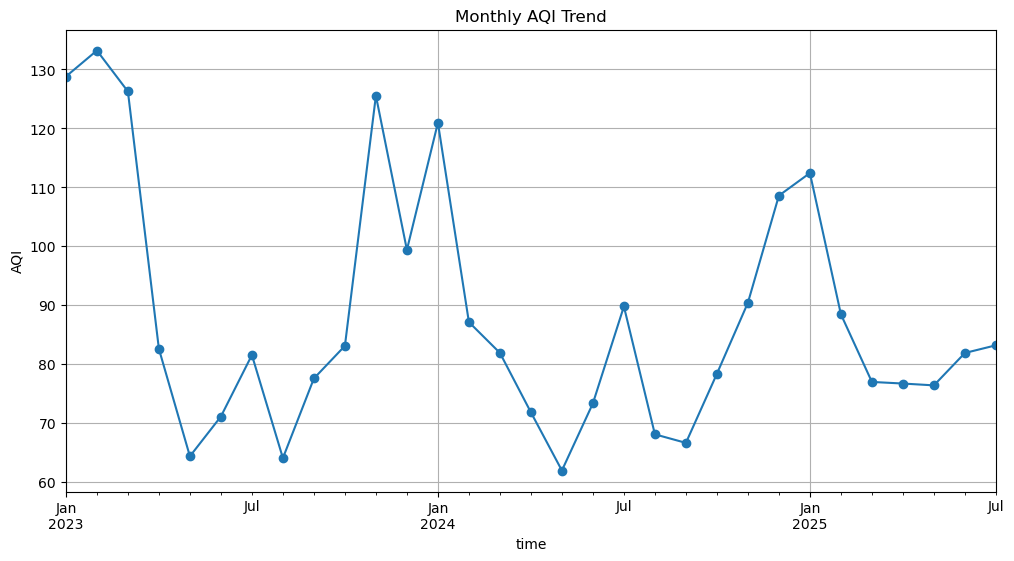

In [22]:
df_monthly = df['AQI'].resample('M').mean()
df_monthly.plot(marker='o', figsize=(12,6))
plt.title("Monthly AQI Trend")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


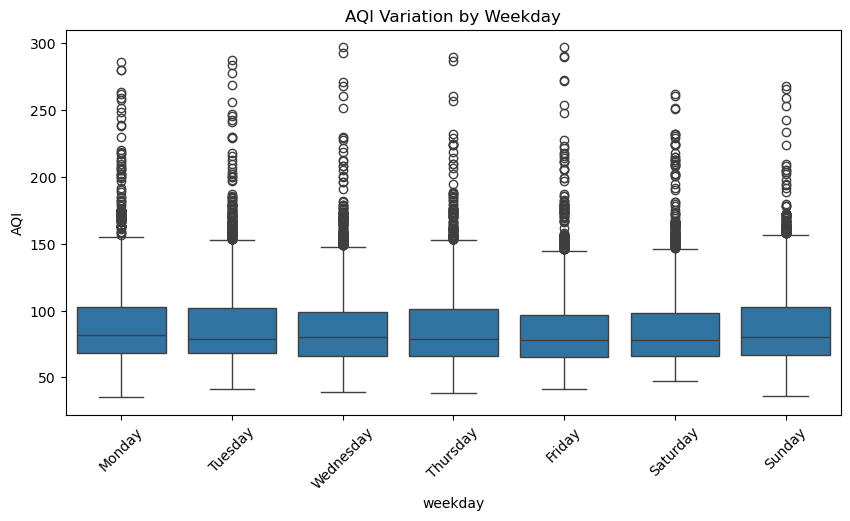

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='weekday', y='AQI', data=df,
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("AQI Variation by Weekday")
plt.xticks(rotation=45)
plt.show()


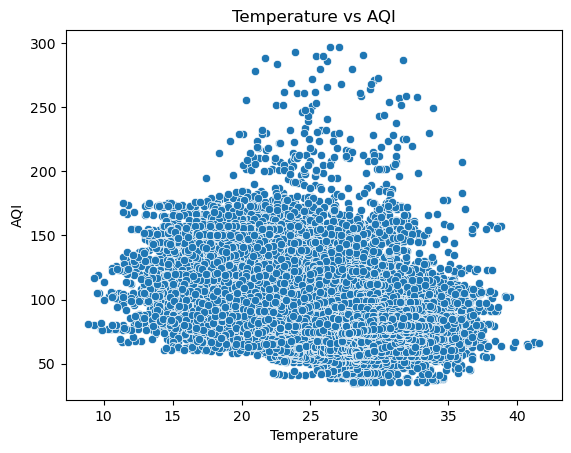

In [24]:
sns.scatterplot(x='Temperature', y='AQI', data=df)
plt.title("Temperature vs AQI")
plt.show()


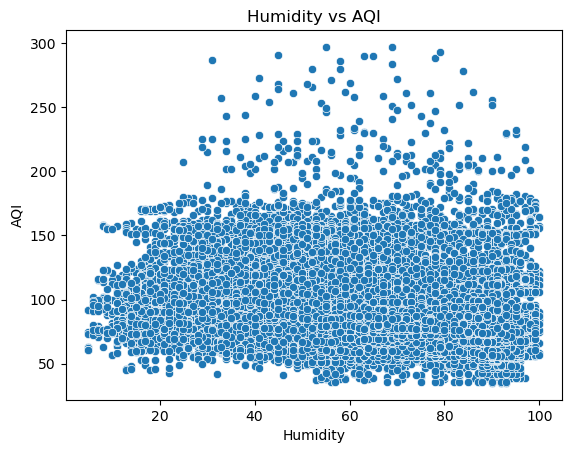

In [25]:
sns.scatterplot(x='Humidity', y='AQI', data=df)
plt.title("Humidity vs AQI")
plt.show()
